In [167]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import metrics #метрики
from sklearn import model_selection #методы разделения и валидации
from sklearn import ensemble #ансамбли

plt.style.use('seaborn-v0_8') #стиль отрисовки seaborn
%matplotlib inline

In [168]:
data = pd.read_csv('online_shoppers_intention.csv')
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [169]:
data.shape

(12330, 18)

In [170]:
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [171]:
data['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

In [172]:
unique_list = []
# пробегаемся по именам столбцов в таблице
for col in data.columns:
    # создаём кортеж (имя столбца, число уникальных значений)
    item = (col, data[col].nunique(),data[col].dtypes)     # добавляем кортеж в список
    unique_list.append(item) 
# создаём вспомогательную таблицу и сортируем её
unique_counts = pd.DataFrame(
    unique_list,
    columns=['Column_Name', 'Num_Unique', 'Type']
).sort_values(by='Num_Unique',  ignore_index=True)
# выводим её на экран
display(unique_counts)

,Column_Name,Num_Unique,Type
0,Revenue,2,bool
1,Weekend,2,bool
2,VisitorType,3,object
3,SpecialDay,6,float64
4,OperatingSystems,8,int64
5,Region,9,int64
6,Month,10,object
7,Browser,13,int64
8,Informational,17,int64
9,TrafficType,20,int64


In [173]:
dummy_data = pd.get_dummies(data)
unique_list = []
# пробегаемся по именам столбцов в таблице
for col in dummy_data.columns:
    # создаём кортеж (имя столбца, число уникальных значений)
    item = (col, dummy_data[col].nunique(),dummy_data[col].dtypes)     # добавляем кортеж в список
    unique_list.append(item) 
# создаём вспомогательную таблицу и сортируем её
unique_counts = pd.DataFrame(
    unique_list,
    columns=['Column_Name', 'Num_Unique', 'Type']
).sort_values(by='Num_Unique',  ignore_index=True)
# выводим её на экран
display(unique_counts)

,Column_Name,Num_Unique,Type
0,Weekend,2,bool
1,VisitorType_New_Visitor,2,uint8
2,Month_Sep,2,uint8
3,Month_Oct,2,uint8
4,Month_Nov,2,uint8
5,Month_May,2,uint8
6,Month_Mar,2,uint8
7,Month_June,2,uint8
8,Month_Jul,2,uint8
9,Month_Feb,2,uint8


False    0.85
True     0.15
Name: Revenue, dtype: float64


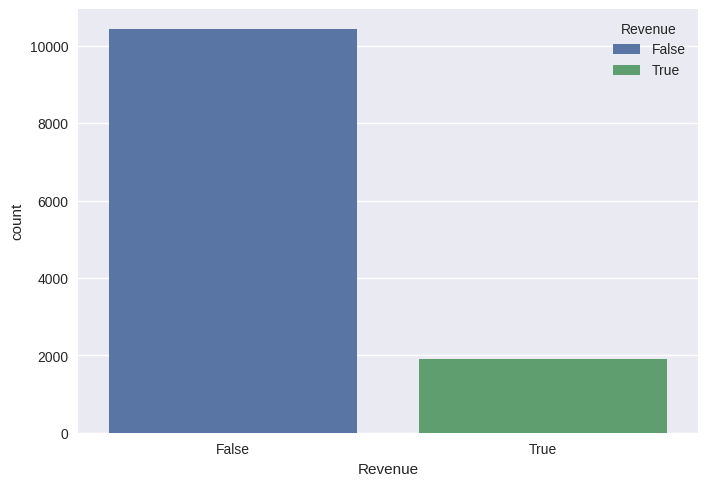

In [174]:
print(dummy_data['Revenue'].value_counts(normalize=True).round(2))
sns.countplot(data=dummy_data,x='Revenue',hue='Revenue',legend=True);

In [175]:
X,y=dummy_data.drop(['Revenue'],axis=1),dummy_data['Revenue']

In [176]:
X_train,X_valid,y_train,y_valid=model_selection.train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [177]:
print(y_train.shape)
print(y_valid.shape)

(9864,)
(2466,)


In [212]:
model=ensemble.RandomForestClassifier(random_state=42)
sv=model_selection.StratifiedKFold(n_splits=5,shuffle=False)
scv=model_selection.cross_validate(
    estimator=model,
    X=X_train,
    y=y_train,
    cv=sv,
    scoring='f1',
    return_train_score=True,)

In [184]:
print(scv['train_score'].mean().round(2))
print(scv['test_score'].mean().round(2))

1.0
0.65


In [181]:
def plot_learning_curve(model, X, y, cv, scoring="f1", ax=None, title=""):
    # Вычисляем координаты для построения кривой обучения
    train_sizes, train_scores, valid_scores = model_selection.learning_curve(
        estimator=model,  # модель
        X=X,  # матрица наблюдений X
        y=y,  # вектор ответов y
        cv=cv,  # кросс-валидатор
        scoring=scoring,  # метрика
    )
    # Вычисляем среднее значение по фолдам для каждого набора данных
    train_scores_mean = np.mean(train_scores, axis=1)
    valid_scores_mean = np.mean(valid_scores, axis=1)
    # Если координатной плоскости не было передано, создаём новую
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 4))  # фигура + координатная плоскость
    # Строим кривую обучения по метрикам на тренировочных фолдах
    ax.plot(train_sizes, train_scores_mean, label="Train")
    # Строим кривую обучения по метрикам на валидационных фолдах
    ax.plot(train_sizes, valid_scores_mean, label="Valid")
    # Даём название графику и подписи осям
    ax.set_title("Learning curve: {}".format(title))
    ax.set_xlabel("Train data size")
    ax.set_ylabel("Score")
    # Устанавливаем отметки по оси абсцисс
    ax.xaxis.set_ticks(train_sizes)
    # Устанавливаем диапазон оси ординат
    ax.set_ylim(0, 1)
    # Отображаем легенду
    ax.legend()

In [185]:
models=[
    ensemble.RandomForestClassifier(n_estimators=200,max_depth=5,min_samples_leaf=5),
    ensemble.RandomForestClassifier(n_estimators=200,max_depth=7,min_samples_leaf=5),
    ensemble.RandomForestClassifier()]



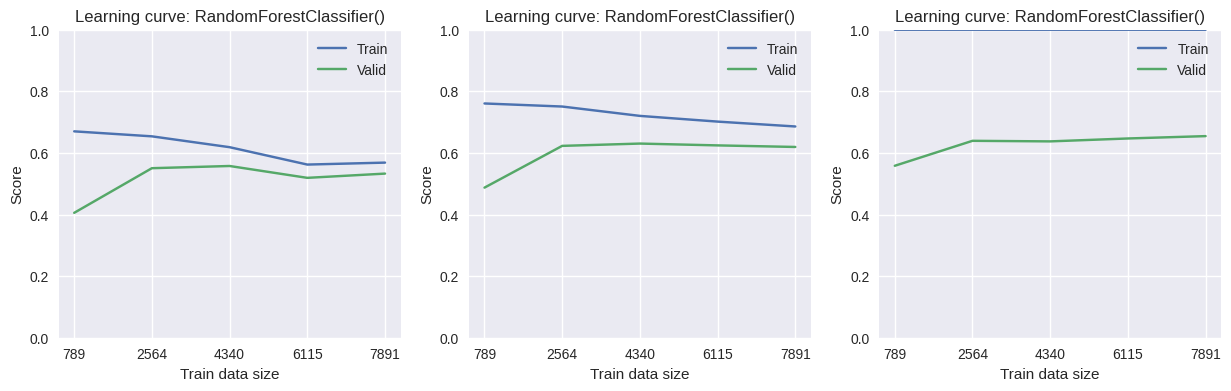

In [186]:

fig, axes = plt.subplots(1, 3, figsize=(15, 4)) #фигура + 3 координатных плоскости
#Создаем цикл по списку моделей и индексам этого списка
for i, model in enumerate(models): #i-текущий индекс, model - текущая модель
    plot_learning_curve(
        model, X_train, y_train, 
        sv, 
        ax=axes[i], 
        title=model.__class__.__name__ + '()');

In [198]:
random_model=ensemble.RandomForestClassifier(n_estimators=200,max_depth=7,min_samples_leaf=5,random_state=42)

random_model.fit(X_train,y_train)

predict_random_y=random_model.predict(X_valid)
predict_random_train=random_model.predict(X_train)
print(metrics.classification_report(y_train,predict_random_train))
print(metrics.classification_report(y_valid,predict_random_y))
                                   

              precision    recall  f1-score   support

       False       0.93      0.98      0.95      8338
        True       0.86      0.57      0.68      1526

    accuracy                           0.92      9864
   macro avg       0.89      0.78      0.82      9864
weighted avg       0.92      0.92      0.91      9864

              precision    recall  f1-score   support

       False       0.91      0.98      0.94      2084
        True       0.79      0.49      0.60       382

    accuracy                           0.90      2466
   macro avg       0.85      0.73      0.77      2466
weighted avg       0.89      0.90      0.89      2466



In [199]:
cvp=model_selection.cross_val_predict(estimator=random_model,
                                      X=X_train,
                                      y=y_train,
                                      cv=sv,
                                      method='predict_proba')
predict_proba_y=cvp[:,1]

In [200]:
precision,recall,thresholds=metrics.precision_recall_curve(y_train,predict_proba_y)

array([0.0016146 , 0.00183509, 0.00191163, ..., 0.84249899, 0.84861057,
       0.85521489])

Best threshold = 0.36, F1-Score = 0.69


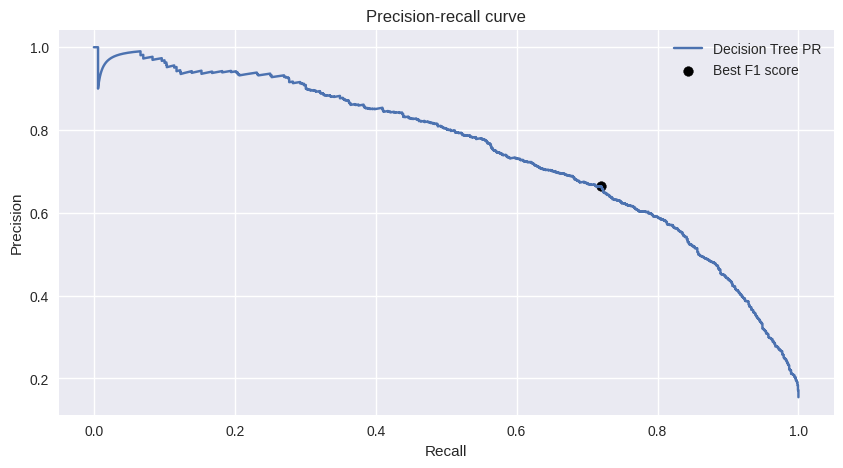

In [201]:
f1_scores = (2 * precision * recall) / (precision + recall)
#Определяем индекс максимума
idx = np.argmax(f1_scores)
print('Best threshold = {:.2f}, F1-Score = {:.2f}'.format(thresholds[idx], f1_scores[idx]))

#Строим PR-кривую
fig, ax = plt.subplots(figsize=(10, 5)) #фигура + координатная плоскость
#Строим линейный график зависимости precision от recall
ax.plot(recall, precision, label='Decision Tree PR')
#Отмечаем точку максимума F1
ax.scatter(recall[idx], precision[idx], marker='o', color='black', label='Best F1 score')
#Даем графику название и подписи осям
ax.set_title('Precision-recall curve')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
#Отображаем легенду
ax.legend();

In [213]:
Best_threshold=0.36

In [214]:
mask=model_selection.cross_val_predict(estimator=random_model,
                                    X=X_valid,
                                    y=y_valid,
                                    cv=sv,
                                    method='predict_proba')




In [217]:
predict_y=(cvp[:,1]>Best_threshold).astype('int')


print(metrics.classification_report(y_train,predict_y))

              precision    recall  f1-score   support

       False       0.95      0.93      0.94      8338
        True       0.66      0.72      0.69      1526

    accuracy                           0.90      9864
   macro avg       0.81      0.83      0.82      9864
weighted avg       0.90      0.90      0.90      9864

